## Executive Summary

In this project, the aim was to make use of clustering techniques such as DBSCAN and KPrototype to identify important variables, in a flight delay dataset, which affect flight performance and answer some hypotheses which can lead to business insights. The report covers all steps involved from data retrieval to exploration and modeling and recommendation. In conclusion, clusters were obtained using both the techniques, however, the more versatile K-Prototype algorithm provided more meaningful ones which answered some of the questions. Having said this, further analyses, research and modeling attempts are required in order to fully address the hypotheses contained in the goal.

## Research questions

We formulated the following questions to assist our research aim.
* Does day of the month play a role in flight delays?
* Are there specific months which have more flight delays than others?
* Are longer duration flights more susceptible to delays than short haul flights?
* Are cancellations related to delays?

In [1]:
# Importing required packages
import numpy as np
import pandas as pd 
import random
from kmodes.kprototypes import KPrototypes
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
import os
print(os.listdir("../input"))

['DelayedFlights.csv', 'st99_d00.dbf', 'st99_d00.shx', 'st99_d00.shp']


In [2]:
#Reading the Data
Data = pd.read_csv('../input/DelayedFlights.csv')
#Dropping the index column
Data= Data.drop(Data.columns[0], axis=1)

## Data Pre-processing


## Sanity checks
Sanity checks were carried out to ensure that the given values are rational. The ArrTime,
CRSEArrivalTime, DepTime and CRSEDepTime columns were checked for negative time values
since these would not make sense.

In [3]:
#Sanity Check for Negative values in ArrTime, CRSEArrivalTime, DepTime and CRSEDepTime
print(all(i < 0 for i in Data['ArrTime']))
print(all(i < 0 for i in Data['CRSArrTime']))
print(all(i < 0 for i in Data['DepTime']))
print(all(i < 0 for i in Data['CRSDepTime']))

False
False
False
False


In [4]:
#Converting Categorical Variables to object type
Data[Data.columns[0:4]]=Data[Data.columns[0:4]].astype(object)
Data[Data.columns[8:10]]=Data[Data.columns[8:10]].astype(object)
Data[Data.columns[21:24]]=Data[Data.columns[21:24]].astype(object)

In [5]:
# Renaming the labels within the variables
Data['Cancelled']=Data['Cancelled'].replace([1,0],["Cancelled","Not Cancelled"])
Data['Diverted']=Data['Diverted'].replace([1,0],["Diverted","Not Diverted"])

## Missing values imputation
After the sanity checks, we went for missing values imputation. Here, we checked the numerical
columns for missing values using the is.na.sum function and imputed them using the linear
interpolate function. The following columns had missing values which were handled: ArrTime,
ActualElapsedTime, CRSElapsedTime, AirTime, ArrDelay, TaxiIn, TaxiOut, CarrierDelay,
WeatherDelay, NASDelay, SecurityDelay and LateAircraftDelay.

In [6]:
#Checking for null values
Data.isna().sum()

Year                      0
Month                     0
DayofMonth                0
DayOfWeek                 0
DepTime                   0
CRSDepTime                0
ArrTime                7110
CRSArrTime                0
UniqueCarrier             0
FlightNum                 0
TailNum                   5
ActualElapsedTime      8387
CRSElapsedTime          198
AirTime                8387
ArrDelay               8387
DepDelay                  0
Origin                    0
Dest                      0
Distance                  0
TaxiIn                 7110
TaxiOut                 455
Cancelled                 0
CancellationCode          0
Diverted                  0
CarrierDelay         689270
WeatherDelay         689270
NASDelay             689270
SecurityDelay        689270
LateAircraftDelay    689270
dtype: int64

In [7]:
#Null value Imputation using Interpolation Method
Data['ActualElapsedTime']=Data['ActualElapsedTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['CRSElapsedTime']=Data['CRSElapsedTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['AirTime']=Data['AirTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['ArrTime']=Data['ArrTime'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['ArrDelay']=Data['ArrDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['CarrierDelay']=Data['CarrierDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['WeatherDelay']=Data['WeatherDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['NASDelay']=Data['NASDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['LateAircraftDelay']=Data['LateAircraftDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['SecurityDelay']=Data['SecurityDelay'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['TaxiIn']=Data['TaxiIn'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data['TaxiOut']=Data['TaxiOut'].interpolate(method='linear',limit_direction ='both',axis=0) #Interploation
Data.isna().sum()

Year                 0
Month                0
DayofMonth           0
DayOfWeek            0
DepTime              0
CRSDepTime           0
ArrTime              0
CRSArrTime           0
UniqueCarrier        0
FlightNum            0
TailNum              5
ActualElapsedTime    0
CRSElapsedTime       0
AirTime              0
ArrDelay             0
DepDelay             0
Origin               0
Dest                 0
Distance             0
TaxiIn               0
TaxiOut              0
Cancelled            0
CancellationCode     0
Diverted             0
CarrierDelay         0
WeatherDelay         0
NASDelay             0
SecurityDelay        0
LateAircraftDelay    0
dtype: int64

## Typo correction
We checked whether the categorical variables have typos using the values.count function.

In [8]:
#Checking value counts for categorical variables

# Filter categorical variables
num_cols = Data._get_numeric_data().columns
cols = Data.columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

#Value counts
for col in cat_cols:
    if col in ['DayOfWeek','UniqueCarrier','Month', 'Cancelled','DayofMonth','CancellationCode','Diverted']:
        print(Data[col].value_counts())

WN    377602
AA    191865
MQ    141920
UA    141426
OO    132433
DL    114238
XE    103663
CO    100195
US     98425
EV     81877
NW     79108
FL     71284
YV     67063
B6     55315
OH     52657
9E     51885
AS     39293
F9     28269
HA      7490
AQ       750
Name: UniqueCarrier, dtype: int64
12    203385
6     200914
3     200842
2     189534
1     183527
7     182945
8     162648
4     155264
5     153072
11    105563
10    103525
9      95539
Name: Month, dtype: int64
Not Cancelled    1936125
Cancelled            633
Name: Cancelled, dtype: int64
Not Diverted    1929004
Diverted           7754
Name: Diverted, dtype: int64
22    71649
21    70168
1     67815
7     67478
15    65587
27    65374
18    65132
20    65071
19    64470
14    64407
24    64202
10    63385
2     63339
11    63331
23    63320
17    63110
8     62979
4     62682
26    62549
9     62057
6     61814
12    61517
13    61278
16    61152
28    61093
3     60389
5     60000
25    59056
29    56893
30    56721
31    3

## Data Exploration
The dataset columns were explored using univariate and bivariate visualisations. This was
followed by a comprehensive correlation plot to understand their relationships and select
significant variables. For the purpose of the report, only significant variables, relationships and
their explorations have been discussed below.

## Univariate Distribution of Features

### Univariate Distribution of Numerical Variables

In [9]:
#Creating a function to plot Box plot and Histogram
def hist_box_plot(df,feature, fig_num):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(8,3))
    filtered = df.loc[~np.isnan(df[feature]), feature]
    sns.boxplot(filtered, ax = ax1, color = 'steelblue') # boxplot
    sns.distplot(filtered, kde=True, hist=True, kde_kws={'linewidth': 1}, color = 'steelblue', ax = ax2) # histogram
    plt.show()

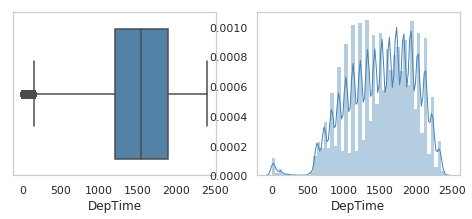

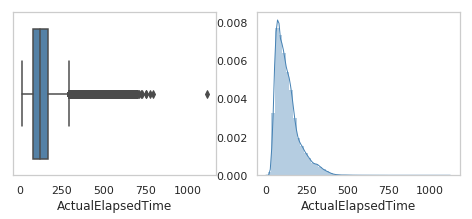

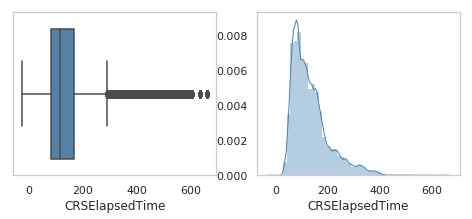

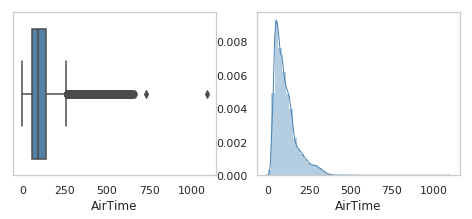

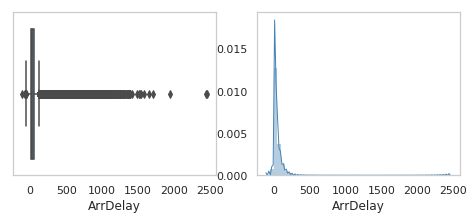

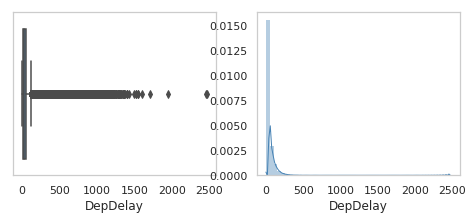

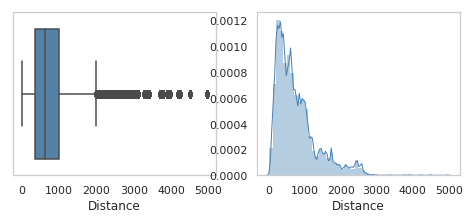

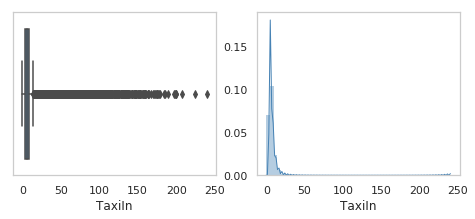

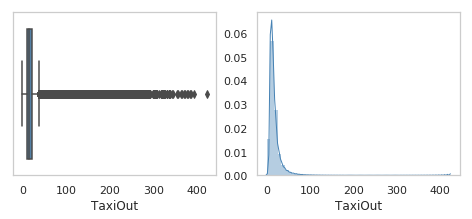

In [10]:
fig_num = 1        
for col in Data.select_dtypes(include=[np.number]).columns:
    if col in ['DepTime','ActualElapsedTime','CRSElapsedTime','AirTime','ArrDelay','DepDelay','Distance','TaxiIn','TaxiOut']:
        hist_box_plot(Data,col, fig_num)
        fig_num = fig_num + 1

### Univariate Distribution of Categorical Variables

In [11]:
#Creating a function to plot Count plot
def count_plot(df,feature):
    sns.set(color_codes = 'Blue', style="whitegrid")
    sns.set_style("whitegrid", {'axes.grid' : False})
    sns.set_context(rc = {'patch.linewidth': 0.0})
    fig = plt.subplots(figsize=(10,3))
    sns.countplot(x=feature, data=df, color = 'steelblue') # countplot
    plt.show()

In [12]:
# Filter categorical variables
num_cols = Data._get_numeric_data().columns
cols = Data.columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

['UniqueCarrier',
 'Year',
 'Month',
 'FlightNum',
 'Cancelled',
 'Diverted',
 'TailNum',
 'Dest',
 'DayofMonth',
 'CancellationCode',
 'DayOfWeek',
 'Origin']

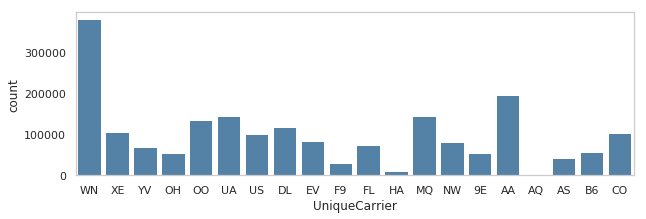

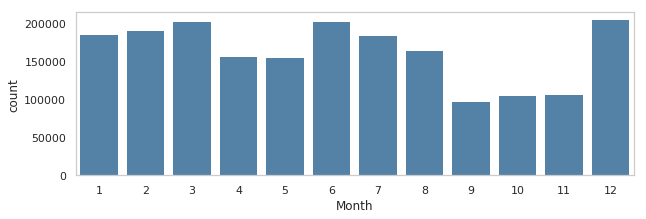

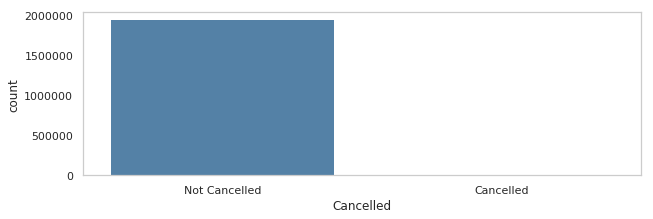

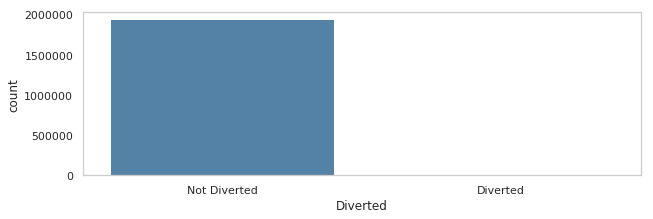

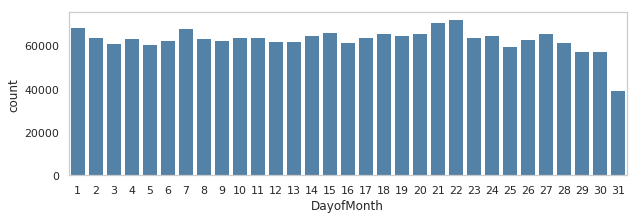

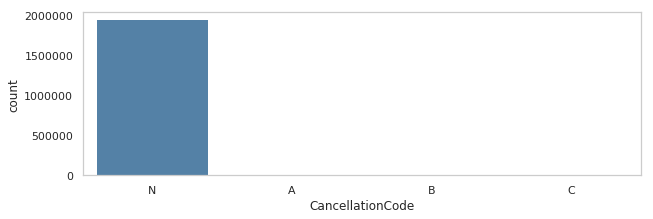

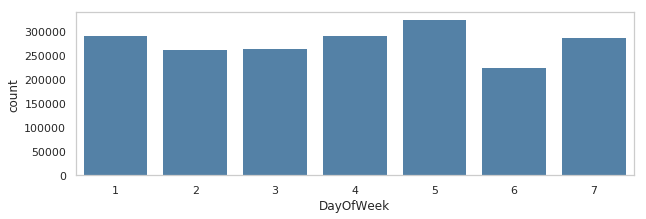

In [13]:
for col in cat_cols:
    if col in ['DayOfWeek','UniqueCarrier','Month', 'Cancelled','DayofMonth','CancellationCode','Diverted']:
        count_plot(Data,col)

## Bivariate Distribution of Features

In [14]:
def biplot(df, x_name, y_name):
    fig, ax = plt.subplots()
    ax.grid(False)
    x = df[x_name]
    y = df[y_name]
    plt.scatter(x,y,c='blue', edgecolors='none',alpha=0.5)
    plt.xlabel(x_name)
    plt.ylabel(y_name)
    plt.title('{x_name} vs. {y_name}'.format(x_name=x_name, y_name=y_name))
    plt.show()

### ArrDelay vs Month
This was checked to understand if there is any truth to the hypothesis that
certain months are worse for Arrival delays than others. The plot shows that very little variation
between the month and Arrival delays and doesn’t support the hypothesis. There are a few
outliers for some months of the year namely, February, April, May and June.

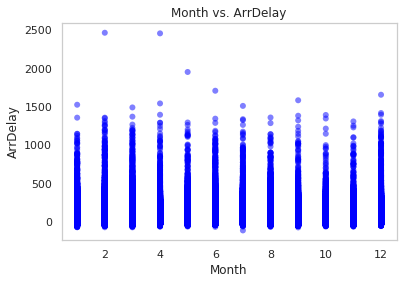

In [15]:
biplot(df=Data,x_name='Month',y_name='ArrDelay')

### ArrDelay vs DepDelay 
This relationship was checked to understand if Arrival Delay of a flight
had an impact on Departure Delay as well and thus an effect on the performance of the
airline/flight. From the plot, we observe that there is a linear dependency between the two
variables indicating that a flight’s delay on Arrival has a role to play in its Departure getting
delayed, which is logical.

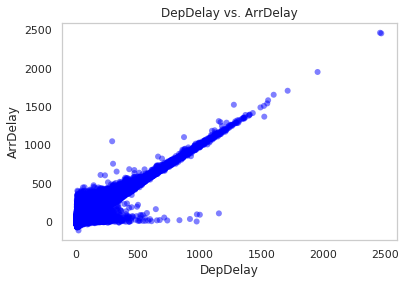

In [16]:
biplot(df=Data,x_name='DepDelay',y_name='ArrDelay')

### ArrDelay vs Distance  
This relationship was explored to understand if there is any relation
between Arrivals getting delayed as a result of the longer Distance of the flight. From the plot, we
observe that there is actually an inverse correlation, shorter flights are the ones seeming to be
delayed more on Arrival.

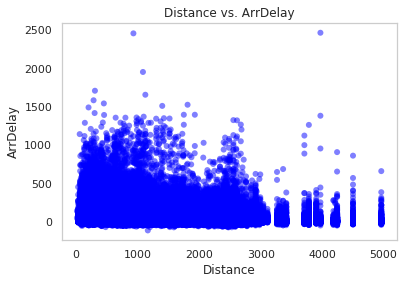

In [17]:
biplot(df=Data,x_name='Distance',y_name='ArrDelay')

### Cancellation vs Months 
This relationship was explored to understand if there are any particular
months where cancellations are particularly more common. The plot shows that this is indeed
the case (probably because end of the year has Christmas and New Year holidays which is a peak
travel season).

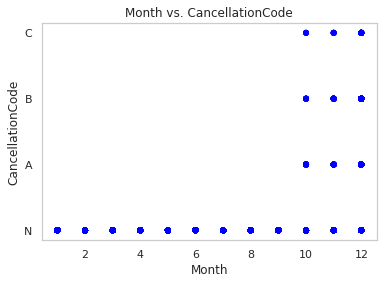

In [18]:
biplot(df=Data,x_name='Month',y_name='CancellationCode')

## Correlation Between Categorical and Numerical

In [19]:
# Installation of the Package follows the following steps:
# git clone https://github.com/shakedzy/dython.git
!pip install dython

In [20]:
# Convert all the columns in float to integer for correlation plot as float is not handled
for y in Data.columns:
    if(Data[y].dtype == np.float64):
        Data[y] = Data[y].astype(int)

Data.dtypes



Year                 object
Month                object
DayofMonth           object
DayOfWeek            object
DepTime               int64
CRSDepTime            int64
ArrTime               int64
CRSArrTime            int64
UniqueCarrier        object
FlightNum            object
TailNum              object
ActualElapsedTime     int64
CRSElapsedTime        int64
AirTime               int64
ArrDelay              int64
DepDelay              int64
Origin               object
Dest                 object
Distance              int64
TaxiIn                int64
TaxiOut               int64
Cancelled            object
CancellationCode     object
Diverted             object
CarrierDelay          int64
WeatherDelay          int64
NASDelay              int64
SecurityDelay         int64
LateAircraftDelay     int64
dtype: object

In [21]:
#Ignoring Year, since the data set is for 2008 and UniqueCarrier,FlightNum,and TailNum, since they won't be effective in correlation
Data_Correlation=Data.iloc[:, [1,2,3,4,5,6,7,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28]]
Data_Correlation.dtypes

Month                object
DayofMonth           object
DayOfWeek            object
DepTime               int64
CRSDepTime            int64
ArrTime               int64
CRSArrTime            int64
ActualElapsedTime     int64
CRSElapsedTime        int64
AirTime               int64
ArrDelay              int64
DepDelay              int64
Origin               object
Dest                 object
Distance              int64
TaxiIn                int64
TaxiOut               int64
Cancelled            object
CancellationCode     object
Diverted             object
CarrierDelay          int64
WeatherDelay          int64
NASDelay              int64
SecurityDelay         int64
LateAircraftDelay     int64
dtype: object

In [22]:
from dython.model_utils import roc_graph
from dython.nominal import associations

def associations_example():
    associations(Data_Correlation,nominal_columns=['Origin','Dest','Cancelled','CancellationCode','Diverted','DayofMonth',
                                           'DayOfWeek','Month'])

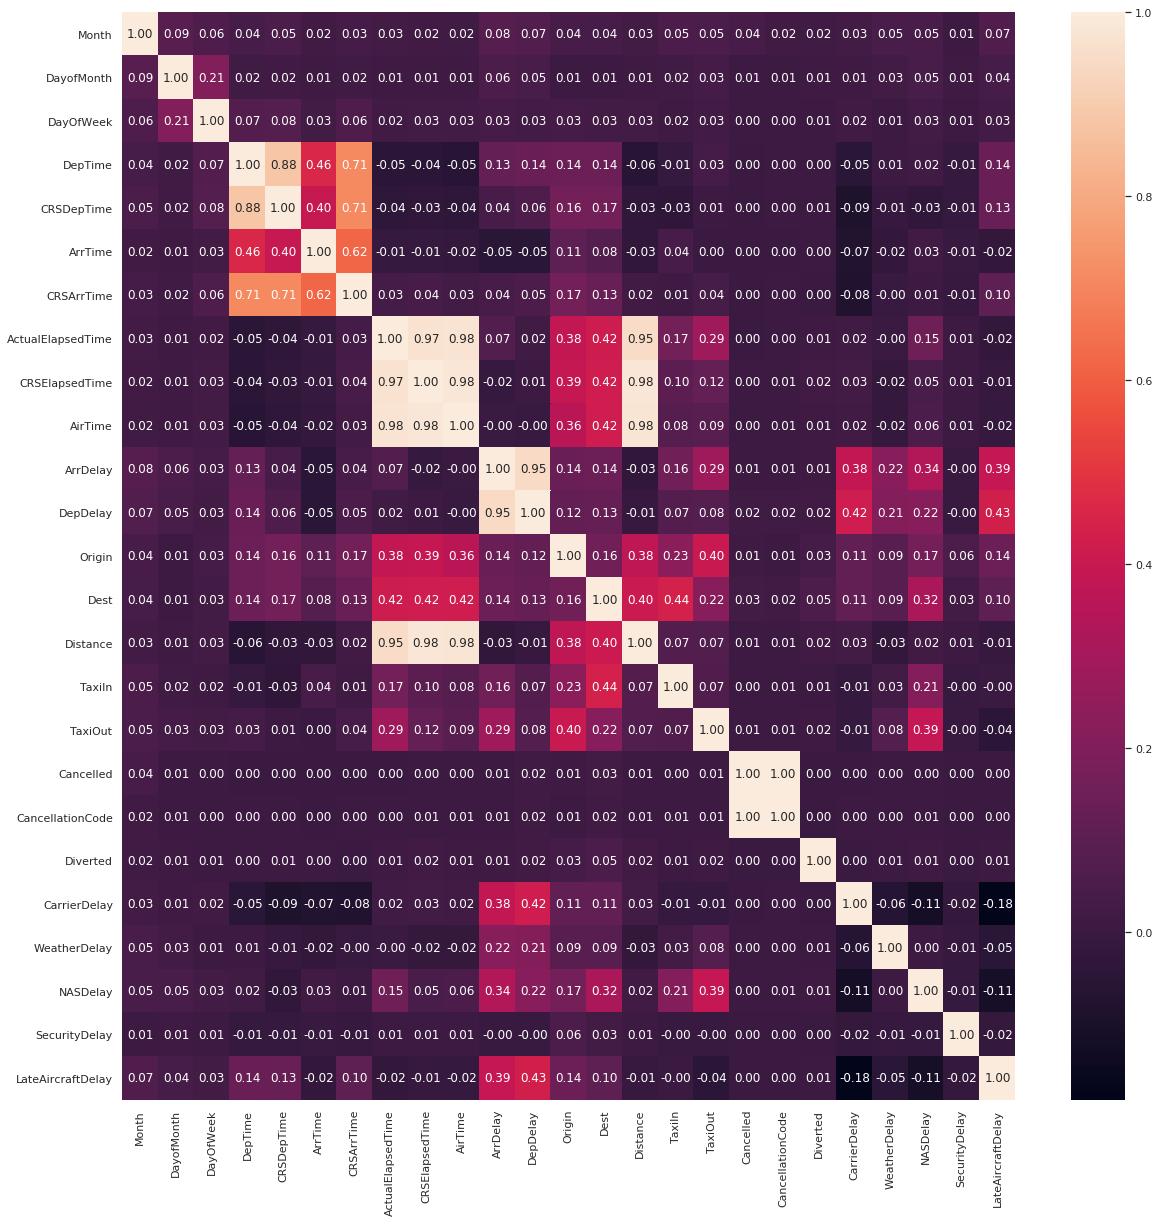

In [23]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=20,20
associations_example()

The plot has been made using Theil’s U, which is also referred to as the Uncertainty Coefficient,
which calculates conditional entropy between two variables – it tries to ascertain how many
possible states does the second variable have given a value of the first variable. This plot’s code
is available using dython package (which works with Python 3.0 and later) (Zychlinski, 2018).
From the above plot, the following are significant observations:

* Variables such as Distance was highly correlated with ActualElapsedTime, CRSElapsedTime, and AirTime (0.95, 0.98 and 0.98). Hence, to avoid multi collinearity, we chose only ActualElapsedTime variable for further study.
* Variables such as ArrDelay and DepDelay were highly highly correlated (0.95) which makes sense because a flight which is delayed on Arrival will most likely leave late and hence be Delayed on Departure. So, one of these two, DepDelay was chosen.
* Cancelled and CancellationCode variables were having a correlation of 1, because cancellation codes are used only in the case when there are Cancellations (and thus Cancelled column has 1). Here, we chose Cancelled variable.
* Origin and Dest were moderately correlated (0.47, 0.45 and 0.43, 0.48) with UniqueCarrier and FlightNum variables respectively. This explains the real-world scenario where certain Carriers fly only between certain cities.
* TaxiIn and TaxiOut are moderately positively correlated (0.44 and 0.40) with Destination and Origin respectively, here we take TaxiOut as the variable to study (related to departure).

## Analyses
From the exploratory analysis and preliminary data modelling, we decided to use three numerical
variables along with one categorical variable (total four with a different one for each analysis) for
our modelling:
* Cancelled, DayOfMonth, DayofWeek, Month– categorical variables
* ActualElapsedTime, TaxiOut and DepDelay – numerical variables

## Data Transformation

In [24]:
# Standardizing all the numerical variables
from sklearn import preprocessing
Num_features=Data.select_dtypes(include=[np.number]).columns
Data[Num_features]=preprocessing.MinMaxScaler().fit_transform(Data[Num_features])
Data.head()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,TailNum,ActualElapsedTime,CRSElapsedTime,AirTime,ArrDelay,DepDelay,Origin,Dest,Distance,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,0.834514,0.828741,0.921217,0.927083,WN,335,N712SW,0.103636,0.255474,0.106324,0.036965,0.000813,IAD,TPA,0.161382,0.016667,0.018957,Not Cancelled,N,Not Diverted,0.000821,0.0,0.0,0.0,0.024316
1,2008,1,3,4,0.313881,0.311573,0.417257,0.416667,WN,3231,N772SW,0.103636,0.248175,0.103575,0.043191,0.005282,IAD,TPA,0.161382,0.020833,0.023697,Not Cancelled,N,Not Diverted,0.000821,0.0,0.0,0.0,0.024316
2,2008,1,3,4,0.261359,0.262823,0.334723,0.312500,WN,448,N428WN,0.074545,0.167883,0.069661,0.047860,0.000813,IND,BWI,0.101798,0.012500,0.040284,Not Cancelled,N,Not Diverted,0.000821,0.0,0.0,0.0,0.024316
3,2008,1,3,4,0.761984,0.743959,0.816173,0.802083,WN,3920,N464WN,0.069091,0.167883,0.070577,0.055642,0.011377,IND,BWI,0.101798,0.012500,0.023697,Not Cancelled,N,Not Diverted,0.000821,0.0,0.0,0.0,0.024316
4,2008,1,3,4,0.808253,0.811785,0.883702,0.879167,WN,378,N726SW,0.079091,0.204380,0.079743,0.046693,0.007720,IND,JAX,0.136740,0.016667,0.023697,Not Cancelled,N,Not Diverted,0.002463,0.0,0.0,0.0,0.029635


 ## Hopkins Statistics
To understand if the dataset can be clustered, we used the Hopkins statistic, which tests the
spatial randomness of the data and indicates the cluster tendency or how well the data can be
clustered. It calculates the probability that a given data is generated by a uniform distribution
(Alboukadel Kassambara, n.d.).
The inference is as follows for a data of dimensions ‘d’:
* If the value is around 0.5 or lesser, the data is uniformly distributed and hence it is unlikely to have statistically significant clusters.
* If the value is between {0.7, ..., 0.99}, it has a high tendency to cluster and therefore likely to have statistically significant clusters.

In [25]:
#Hopkins Statistic is a way of measuring the cluster tendency of a data set.
from sklearn.neighbors import NearestNeighbors
from random import sample
from numpy.random import uniform
import numpy as np
from math import isnan
 
def hopkins(X):
    d = X.shape[1]
    #d = len(vars) # columns
    n = len(X) # rows
    m = int(0.1 * n) # heuristic from article [1]
    nbrs = NearestNeighbors(n_neighbors=1).fit(X.values)
 
    rand_X = sample(range(0, n, 1), m)
 
    ujd = []
    wjd = []
    for j in range(0, m):
        u_dist, _ = nbrs.kneighbors(uniform(np.amin(X,axis=0),np.amax(X,axis=0),d).reshape(1, -1), 2, return_distance=True)
        ujd.append(u_dist[0][1])
        w_dist, _ = nbrs.kneighbors(X.iloc[rand_X[j]].values.reshape(1, -1), 2, return_distance=True)
        wjd.append(w_dist[0][1])
 
    H = sum(ujd) / (sum(ujd) + sum(wjd))
    if isnan(H):
        print(ujd, wjd)
        H = 0
 
    return H

## Data Modelling

In [26]:
#Use a random sample of Data for faster computation
Data = Data.sample(20000,random_state=41)
Data.head()
#Resetting the indexs
Data=Data.reset_index(drop=True)
#Rename the levels within in the CancellationCode column
Data['CancellationCode']=Data['CancellationCode'].replace(['N','A','B','C'],[0,1,2,3])
Data['CancellationCode']=Data['CancellationCode'].astype(object)
Data['Cancelled']=Data['Cancelled'].replace(["Cancelled","Not Cancelled"],[1,0])
Data['Cancelled']=Data['Cancelled'].astype(object)
Data.columns

Index(['Year', 'Month', 'DayofMonth', 'DayOfWeek', 'DepTime', 'CRSDepTime',
       'ArrTime', 'CRSArrTime', 'UniqueCarrier', 'FlightNum', 'TailNum',
       'ActualElapsedTime', 'CRSElapsedTime', 'AirTime', 'ArrDelay',
       'DepDelay', 'Origin', 'Dest', 'Distance', 'TaxiIn', 'TaxiOut',
       'Cancelled', 'CancellationCode', 'Diverted', 'CarrierDelay',
       'WeatherDelay', 'NASDelay', 'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')

In [27]:
#Checking whether data can be clustered
Num_features =Data.select_dtypes(include=[np.number]).columns
hopkins(Data[Num_features])

0.9609138716691604

Result: This test is run (code: (MATEVZKUNAVER, 2017)) on all the numerical variables of the
entire dataset and the test statistic we got is 0.96 which indicates that data has a high tendency
to cluster.

### Prinicpal Component Analysis

Principal component analysis (PCA) is a technique used to emphasize variation and bring out
strong patterns in a dataset. The PCs are dimensions along which the data points are spread out
(Amy, 2017). We use PCA to understand if the clusters are meaningful along certain features.

For this attempt, the first step was to standardise the data. Then, we selected three numerical
variables namely, ActualElapsedTime, TaxiOut and DepDelay, and proceeded to obtain the
cumulative variance by trying out different number of principal components. The optimum value
the PCA achieved was three, which captured a cumulative variance of ~99% (code: (Vlo, 2017)).
These PCs were utilised in the K-Prototype model. The optimal number of clusters (k) of two was
obtained using the elbow plot for the K-Prototype model (explained later). Of all the categorical
variables, ‘Cancelled’ variable was used to visualise the clusters.

In [28]:
#Selection of variables for PCA
Data_pca= Data[['Cancelled','ActualElapsedTime','TaxiOut', 'DepDelay']]
print (Data_pca.dtypes)

Cancelled             object
ActualElapsedTime    float64
TaxiOut              float64
DepDelay             float64
dtype: object


In [29]:
#Principal Component
from sklearn.decomposition import PCA
pca = PCA(n_components=3, whiten=True)
Num_features=Data_pca.select_dtypes(include=[np.number]).columns
x=Data_pca[Num_features]
principalComponents = pca.fit_transform(x)

# Cumulative Explained Variance
cum_explained_var = []
for i in range(0, len(pca.explained_variance_ratio_)):
    if i == 0:
        cum_explained_var.append(pca.explained_variance_ratio_[i])
    else:
        cum_explained_var.append(pca.explained_variance_ratio_[i] + 
                                 cum_explained_var[i-1])

print(cum_explained_var)

[0.7481516730719856, 0.9237217418433828, 0.9999999999999999]


In [30]:
#Principal Components converted to a Data frame
principalDf  = pd.DataFrame(data = principalComponents
             , columns = ['principal component 1', 'principal component 2', 'principal component 3'])
principalDf.shape

(20000, 3)

In [31]:
#Concatenating the PCAs with the categorical variable
finalDf_Cat = pd.concat([principalDf, Data_pca['Cancelled']], axis = 1)
finalDf_Cat.head(2)

,principal component 1,principal component 2,principal component 3,Cancelled
0,-0.465212,-0.175682,-0.668955,0
1,0.091599,0.792524,-0.771702,0


<function matplotlib.pyplot.show(*args, **kw)>

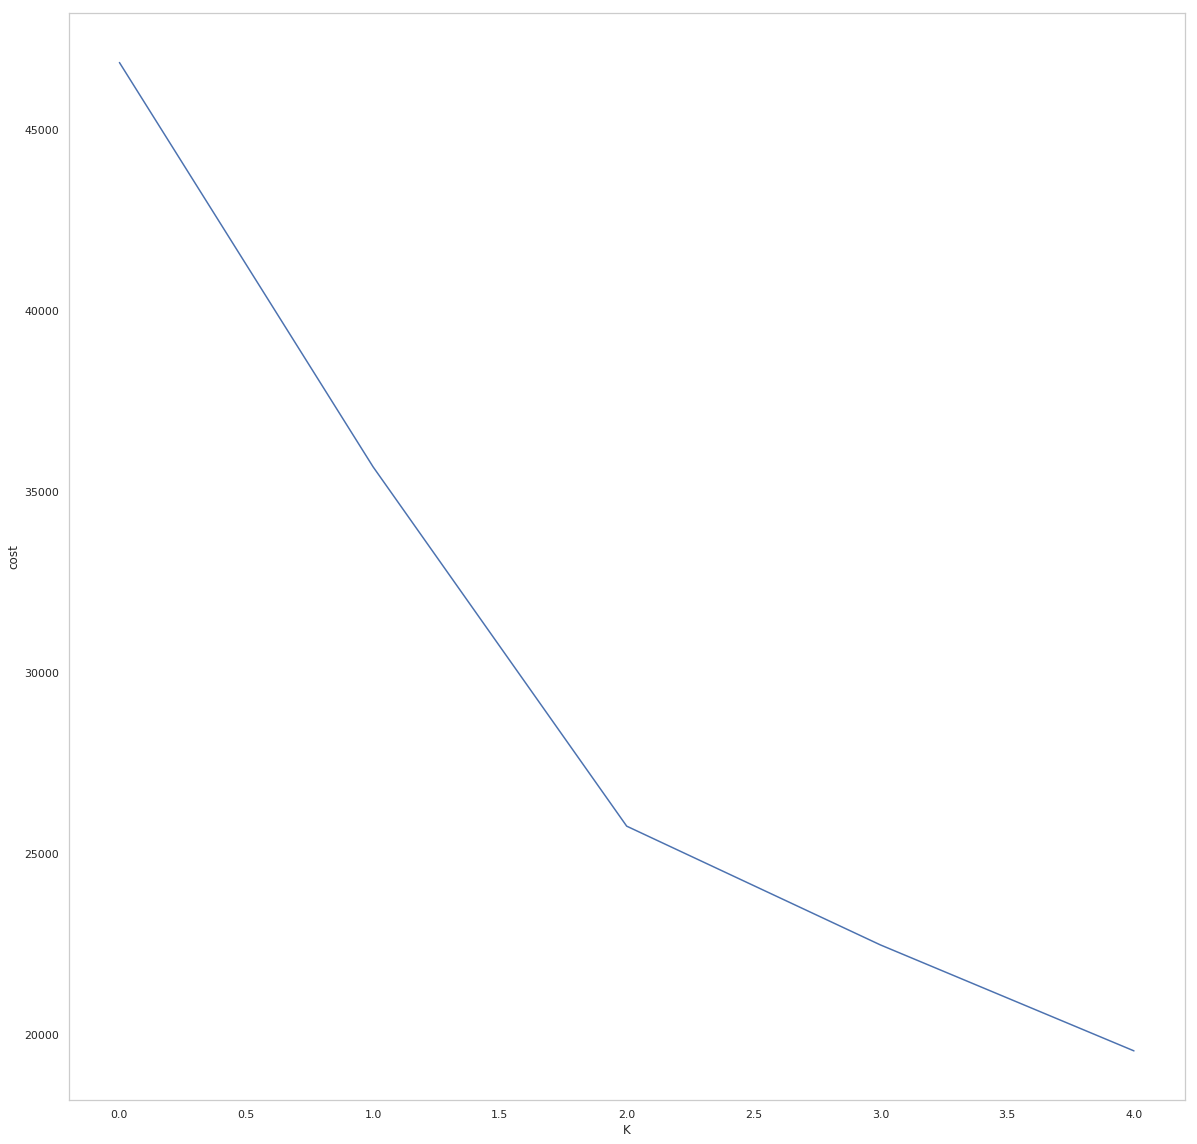

In [32]:
#Choosing optimal K value
cost = []
X = finalDf_Cat
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50) 
    kproto.fit_predict(X, categorical=[3])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [33]:
# Converting the dataset into matrix
X = finalDf_Cat.as_matrix()

In [34]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=0, random_state=42,max_iter=20, n_init=50,n_jobs=-2,gamma=.25) 
clusters = kproto.fit_predict(X, categorical=[3])

1    15753
0     4247
Name: Cluster_id, dtype: int64


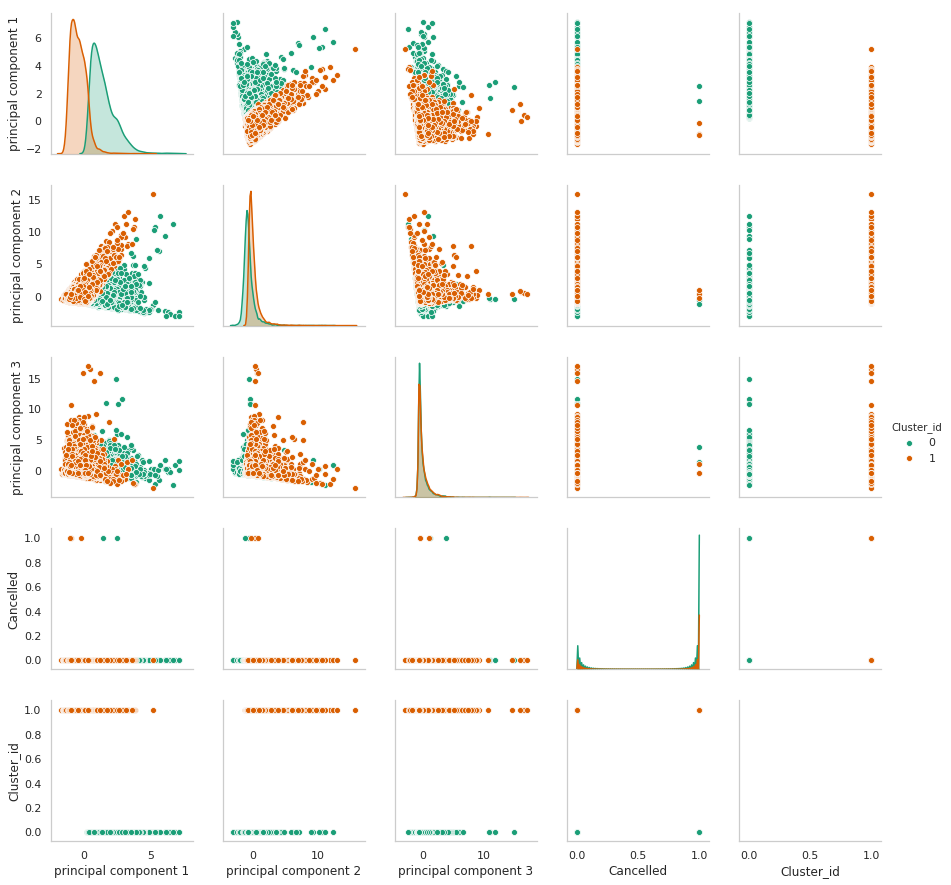

In [35]:
#Visualize K-Prototype clustering on the PCA projected Data
df=pd.DataFrame(finalDf_Cat)
df['Cluster_id']=clusters
print(df['Cluster_id'].value_counts())
sns.pairplot(df,hue='Cluster_id',palette='Dark2',diag_kind='kde')

From the above plot, we can observe that there is approximately distinct cluster formation.
Therefore, this substantiates the approach of clustering for this dataset. We now proceed with
running the clustering with two algorithms, namely, DBSCAN (for numeric variables) and KPrototype
(for mix of categorical and numerical variables).

### DBSCAN Clustering Algorithm

This clustering model works with numerical variables, by aggregation depending on density of
points near the chosen centroids. This model is robust for numerical variables, doesn’t need the
number of clusters to be specified prior and can deal with arbitrary shaped clusters (Ren, 2019).
The eps parameter for the model is chosen as below:

In [36]:
#Selection of numerical variables for DBSCAN
Data_DBSCAN = Data[['ActualElapsedTime','TaxiOut', 'DepDelay']]

### Choosing eps parameter using the K-distance graph:
We used the below k distance graph from sklearn to find the optimal value of eps, which was
found to be 0.035 (also from model iterations) and chose min_samples to be 4 according to the
criteria that min_samples >= D+1 where D is the dimensions of the data (Ren, 2019) (here, we
had 3 numerical variables).

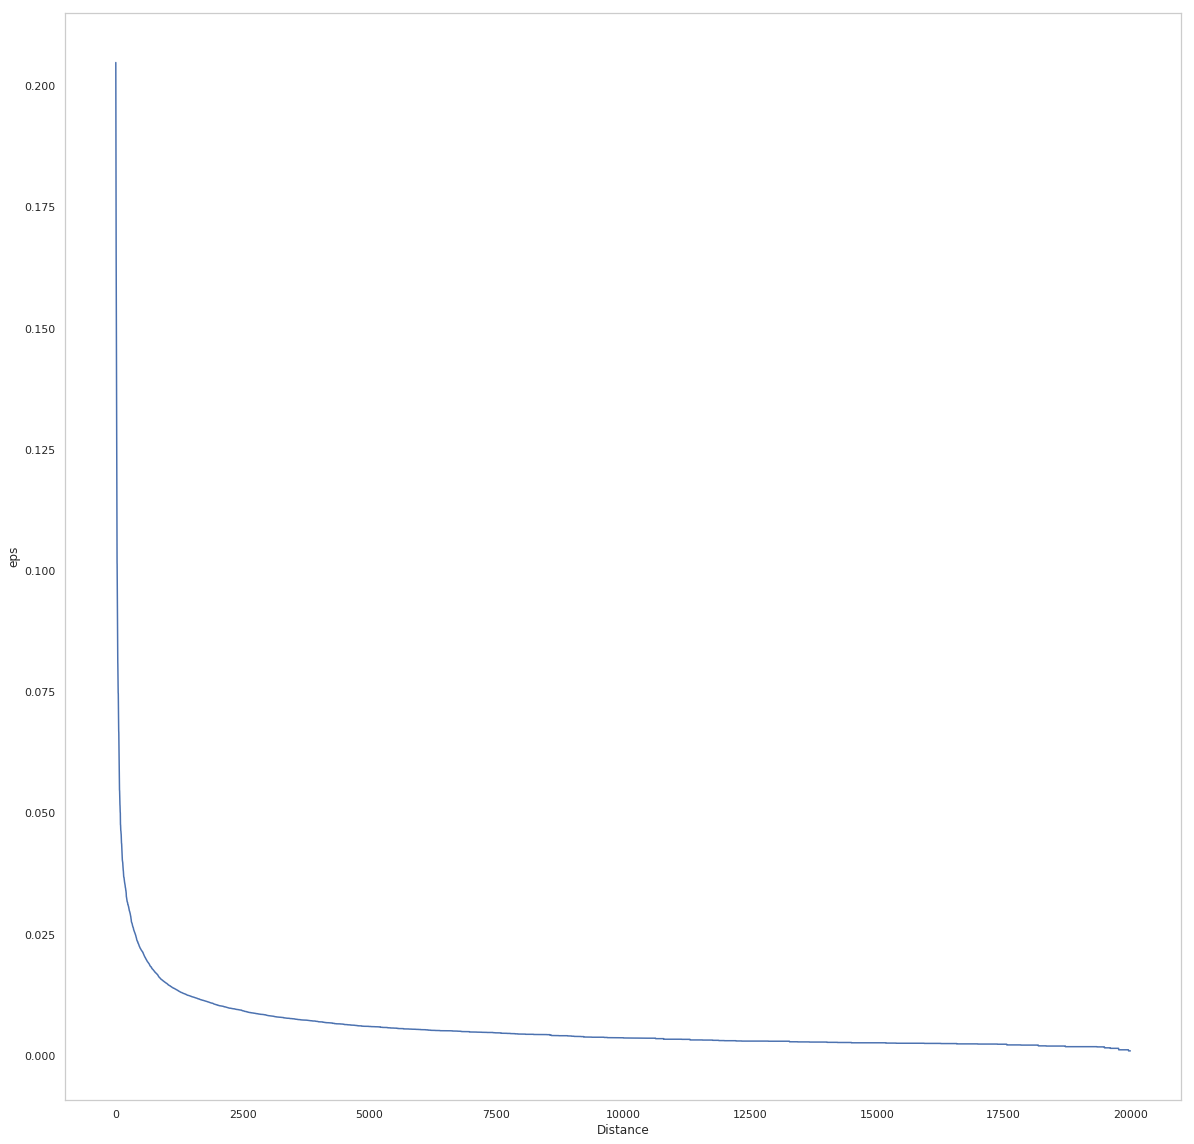

In [37]:
#selection of eps value
from sklearn.neighbors import NearestNeighbors
nbrs=NearestNeighbors().fit(Data_DBSCAN)
distances, indices = nbrs.kneighbors(Data_DBSCAN,20)
kDis = distances[:,10]
kDis.sort()
kDis = kDis[range(len(kDis)-1,0,-1)]
plt.plot(range(0,len(kDis)),kDis)
plt.xlabel('Distance')
plt.ylabel('eps')
plt.show()

In [38]:
#DBSCAN Algorithm
from sklearn.cluster import DBSCAN
dbs_1= DBSCAN(eps=0.035, min_samples=4)
results = dbs_1.fit(Data_DBSCAN).labels_

 0    19930
-1       64
 1        6
Name: Cluster_id_DBSCAN, dtype: int64


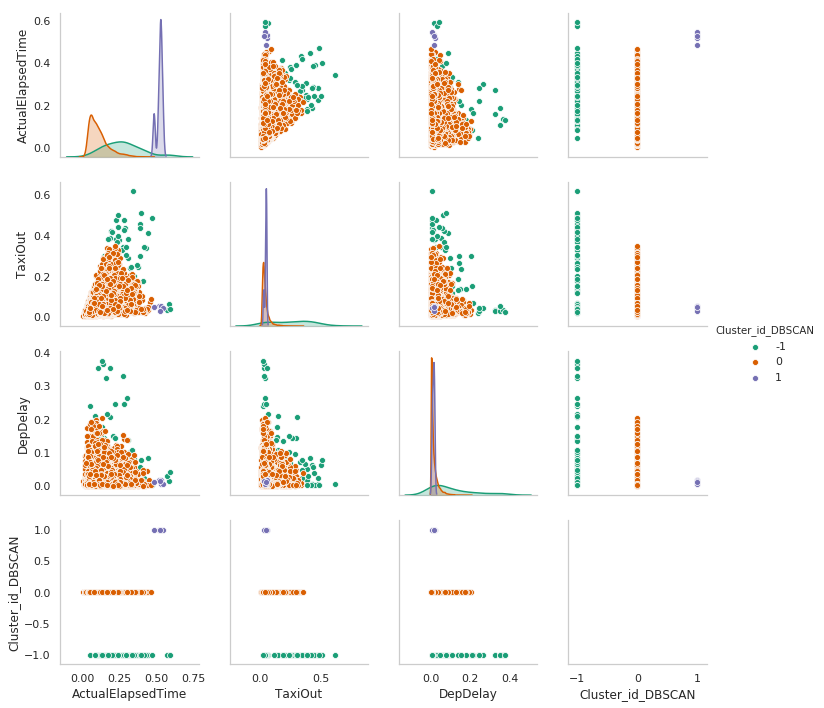

In [39]:
#Visualize DBSCAN clustering 
df_DBSCAN=Data_DBSCAN
df_DBSCAN['Cluster_id_DBSCAN']=results
print (df_DBSCAN['Cluster_id_DBSCAN'].value_counts())
sns.pairplot(df_DBSCAN,hue='Cluster_id_DBSCAN',palette='Dark2',diag_kind='kde')

Next, using the eps and min_samples parameters, the DBScan model was run (code: (Ren, 2019))
on a standardised sample of 20,000 observations randomly selected using the ‘sample’ function
of ‘random’ package.

Finally, from the above clusters plot here, we find that there are three clusters formed (-1,0,1) but
they are not clear in distinction, but majority of the points are in one cluster (as per the cluster_id
column in the plot above). The variable ‘ActualElapsedTime’ is the one with the most distinction
between the clusters.

Since the above clustering algorithm can only handle numerical variables, it proves to be
insufficient since a categorical variable needs to be included in order to effectively explore the
research questions. Hence, we proceed with k-prototype clustering model which can handle both
numerical and categorical variables.

### Kprototype Clustering Algorithm

This is a clustering model which includes a combination of k-means and k-modes models to
achieve clustering of data points around certain prototypes (similar concept as centroids). It
calculates Euclidean distances for numerical variables and Similarities for categorical variables
and uses an assumed gamma as weightage (which decides the preference towards categorical or
numerical variables), to assign points to a cluster. This is iteratively done by re-assigning points
to the right clusters each time and stops when the desired number of moves or iterations has
been achieved (Huang, 1997).

Gamma is guided by the average standard deviation of the numeric attributes. In cases where
gamma is not specified (from domain knowledge), it is automatically calculated from the data.
In our model, the parameter value of gamma was found to be 0.15 (which gave somewhat distinct
clusters) after iteration using fractions of sigma, which is the standard deviation of the chosen numerical variables. Smaller values (closer to 0) of gamma favour the numerical variables while
those larger favour (away from 0) the categorical variables (Huang, 1997).

In [40]:
#Getting the list of Numerical and Categorical Variables
num_cols = Data._get_numeric_data().columns
print (num_cols)
cols = Data.columns
cat_cols = list(set(cols) - set(num_cols))
cat_cols

Index(['DepTime', 'CRSDepTime', 'ArrTime', 'CRSArrTime', 'ActualElapsedTime',
       'CRSElapsedTime', 'AirTime', 'ArrDelay', 'DepDelay', 'Distance',
       'TaxiIn', 'TaxiOut', 'CarrierDelay', 'WeatherDelay', 'NASDelay',
       'SecurityDelay', 'LateAircraftDelay'],
      dtype='object')


['UniqueCarrier',
 'Year',
 'Month',
 'FlightNum',
 'Cancelled',
 'Diverted',
 'TailNum',
 'Dest',
 'DayofMonth',
 'CancellationCode',
 'DayOfWeek',
 'Origin']

In [41]:
#Selection of variables for Kprototype Clustering Algorithm
Data_k= Data[['Cancelled','ActualElapsedTime','TaxiOut', 'DepDelay']]
print (Data_k.dtypes)

Cancelled             object
ActualElapsedTime    float64
TaxiOut              float64
DepDelay             float64
dtype: object


### Choosing K (number of clusters) from the elbow plot:
Here, we use the elbow plot between cost and number of clusters (k), where cost is a combined
similarity measure for both numeric and categorical variables calculated between the objects and
the cluster prototypes (Huang, 1997), for the K-prototype clustering model (similar to the
process for k-means but utilising categorical variables as well) to arrive at the optimal number of
clusters. From the above, we select two as the possible number of clusters.

<function matplotlib.pyplot.show(*args, **kw)>

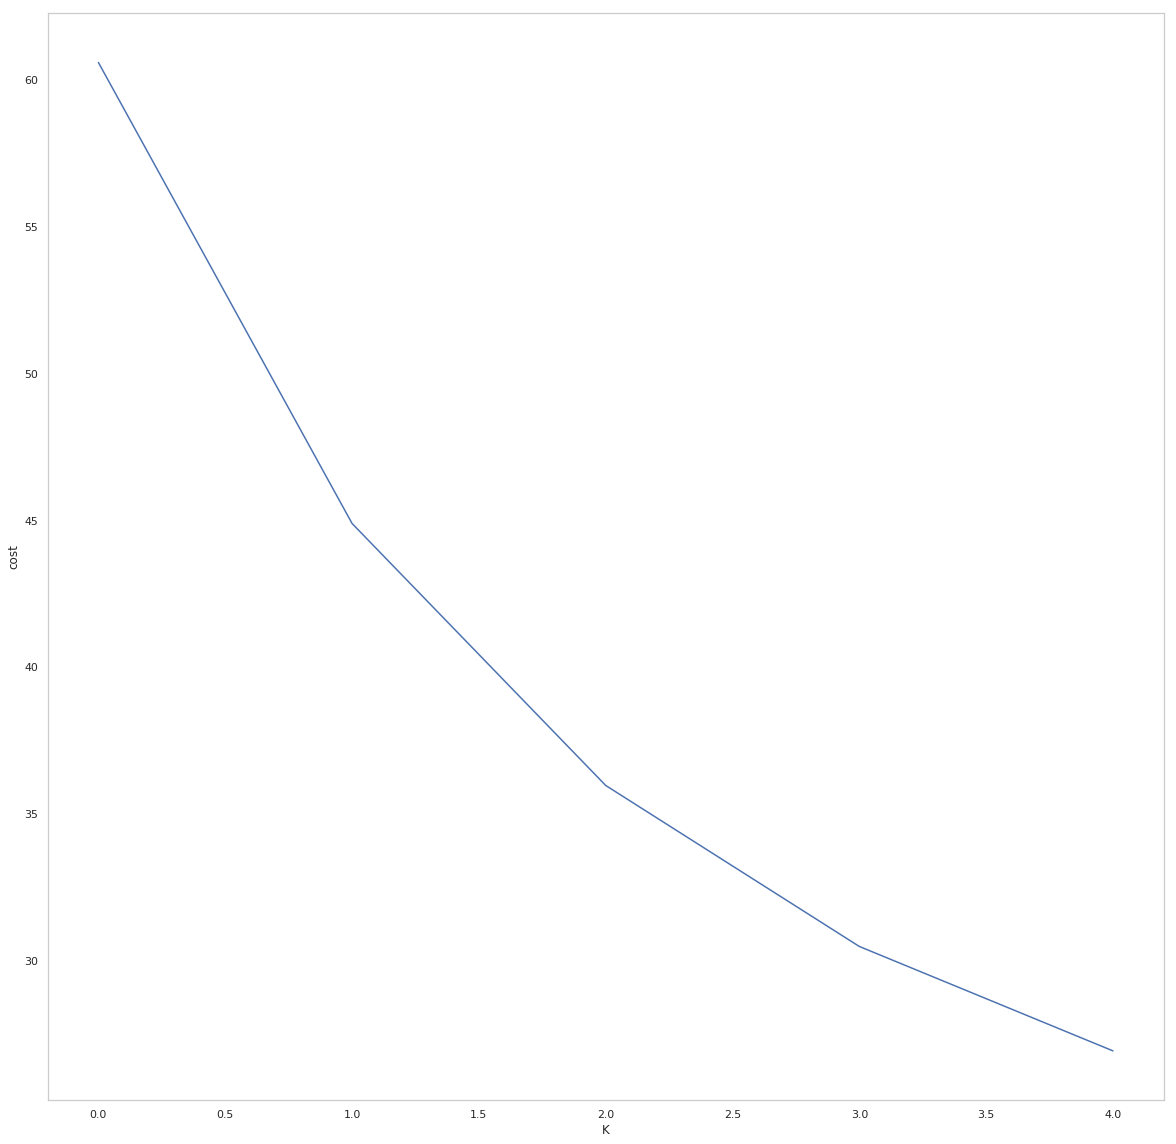

In [42]:
#Choosing optimal K value
cost = []
X = Data_k
for num_clusters in list(range(2,7)):
    kproto = KPrototypes(n_clusters=num_clusters, init='Huang', random_state=42,n_jobs=-2,max_iter=15,n_init=50) 
    kproto.fit_predict(X, categorical=[0])
    cost.append(kproto.cost_)

plt.plot(cost)
plt.xlabel('K')
plt.ylabel('cost')
plt.show

In [43]:
# Converting the dataset into matrix
X = Data_k.as_matrix()

In [44]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=0, random_state=42,max_iter=20, n_init=50,n_jobs=-2,gamma=0.15) 
clusters = kproto.fit_predict(X, categorical=[0])

0    15238
1     4762
Name: Cluster_id_K_Prototype, dtype: int64


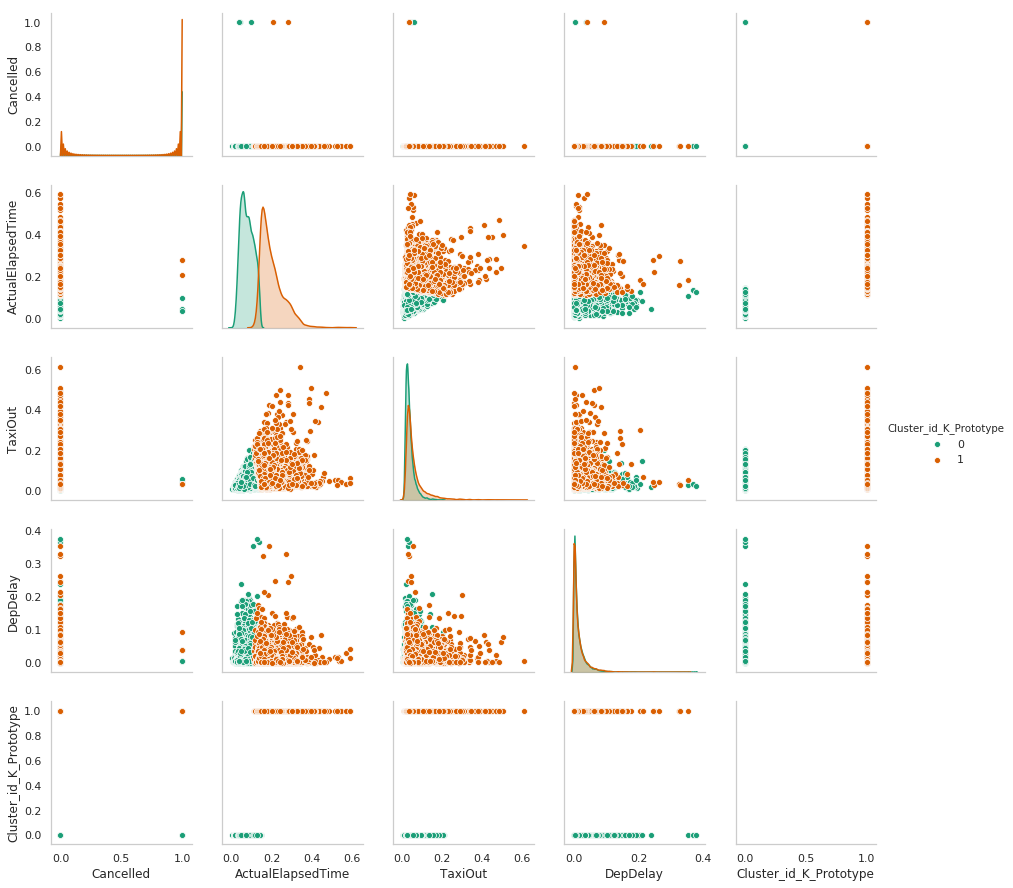

In [45]:
#Visualize K-Prototype clustering 
df_Cancelled=pd.DataFrame(Data_k)
df_Cancelled['Cluster_id_K_Prototype']=clusters
print (df_Cancelled['Cluster_id_K_Prototype'].value_counts())
sns.pairplot(df_Cancelled,hue='Cluster_id_K_Prototype',palette='Dark2',diag_kind='kde')

In [46]:
#Selection of variables for Kprototype Clustering Algorithm
Data_k= Data[['DayofMonth','ActualElapsedTime','TaxiOut', 'DepDelay']]
print (Data_k.dtypes)

DayofMonth            object
ActualElapsedTime    float64
TaxiOut              float64
DepDelay             float64
dtype: object


0    13967
1     6033
Name: Cluster_id, dtype: int64


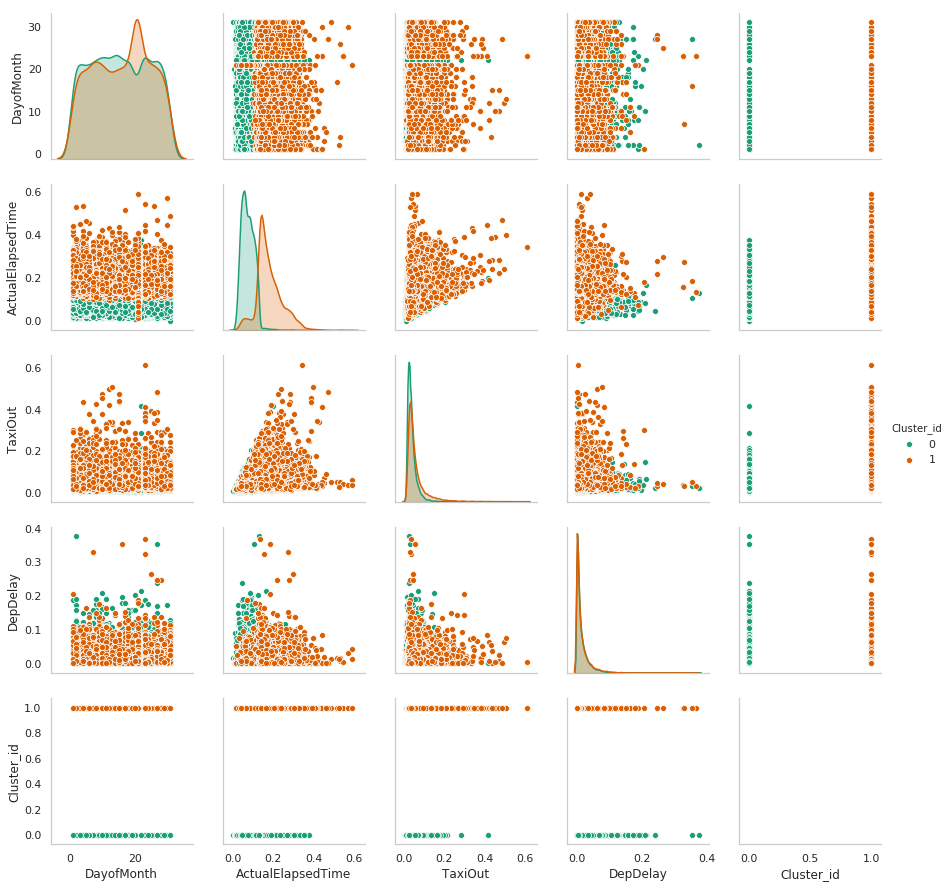

In [47]:
# Converting the dataset into matrix
X = Data_k.as_matrix()
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=0, random_state=42,max_iter=20, n_init=50,n_jobs=-2,gamma=0.15) 
clusters = kproto.fit_predict(X, categorical=[0])
#Visualize K-Prototype clustering
df=pd.DataFrame(Data_k)
df['Cluster_id']=clusters
print(df['Cluster_id'].value_counts())
sns.pairplot(df,hue='Cluster_id',palette='Dark2',diag_kind='kde')

In [48]:
#Selection of variables for Kprototype Clustering Algorithm
Data_k= Data[['DayOfWeek','ActualElapsedTime','TaxiOut', 'DepDelay']]
print(Data_k.dtypes)

DayOfWeek             object
ActualElapsedTime    float64
TaxiOut              float64
DepDelay             float64
dtype: object


0    11641
1     8359
Name: Cluster_id, dtype: int64


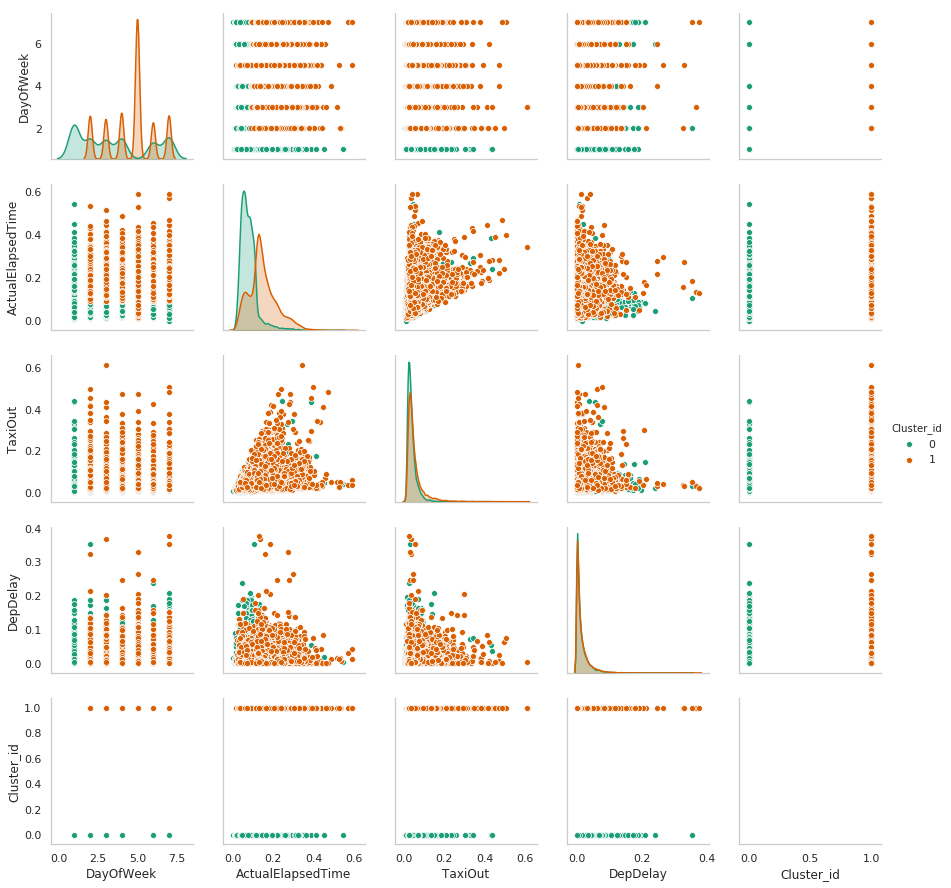

In [49]:
# Converting the dataset into matrix
X = Data_k.as_matrix()
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=0, random_state=42,max_iter=20, n_init=50,n_jobs=-2,gamma=0.15) 
clusters = kproto.fit_predict(X, categorical=[0])
#Visualize K-Prototype clustering 
df=pd.DataFrame(Data_k)
df['Cluster_id']=clusters
print(df['Cluster_id'].value_counts())
sns.pairplot(df,hue='Cluster_id',palette='Dark2',diag_kind='kde')

In [50]:
#Selection of variables for Kprototype Clustering Algorithm
Data_k= Data[['Month','ActualElapsedTime','TaxiOut', 'DepDelay']]
print(Data_k.dtypes)

Month                 object
ActualElapsedTime    float64
TaxiOut              float64
DepDelay             float64
dtype: object


1    12589
0     7411
Name: Cluster_id, dtype: int64


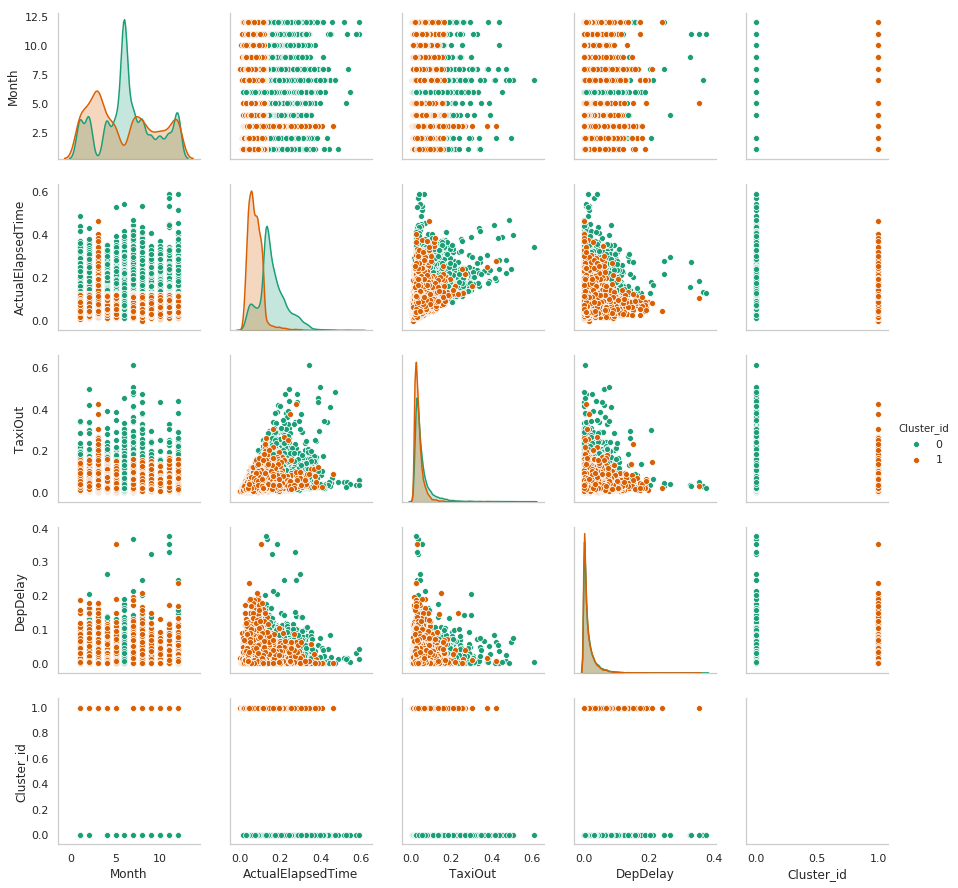

In [51]:
# Converting the dataset into matrix
X = Data_k.as_matrix()
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=2, init='Huang', verbose=0, random_state=42,max_iter=20, n_init=50,n_jobs=-2,gamma=0.15) 
clusters = kproto.fit_predict(X, categorical=[0])
#Visualize K-Prototype clustering 
df=pd.DataFrame(Data_k)
df['Cluster_id']=clusters
print(df['Cluster_id'].value_counts())
sns.pairplot(df,hue='Cluster_id',palette='Dark2',diag_kind='kde')

From the above plots, it is observed that there are two clusters (0,1) and the variables Day of the
month or Day of the week or Month of the year do not play a significant role in distinction between
clusters. For Cancelled variable, we do see distinct clusters for both cancelled and not cancelled
levels, but the number of points is very small in cancelled level to make a conclusion.

### Cluster Agreement 

We have seen that K-prototype is better in terms of its ability to handle categorical variables
along with numerical ones. Also, the clusters are more meaningful with the K-prototype model.

In [52]:
#join DBScan and K-prototype data frames
Clusters=pd.concat([df_Cancelled, df_DBSCAN, Data[['DayOfWeek','DayofMonth','Month']]], axis = 1)
Clusters=Clusters.iloc[:, [0,1,2,3,4,8,9,10,11]]
Clusters.head()

,Cancelled,ActualElapsedTime,TaxiOut,DepDelay,Cluster_id_K_Prototype,Cluster_id_DBSCAN,DayOfWeek,DayofMonth,Month
0,0,0.079091,0.033175,0.000000,0,0,3,25,6
1,0,0.109091,0.071090,0.001219,0,0,1,3,11
2,0,0.085455,0.026066,0.002844,0,0,4,3,1
3,0,0.048182,0.045024,0.034132,0,0,4,9,10
4,0,0.089091,0.028436,0.004063,0,0,5,19,12


For further clarity, we compare the cluster agreements between DBSCAN and K-prototype for 10
pairs of random values. The pairs considered are two adjacent rows, for example, rows index of
18625 and 19746 form the first pair, 11209 and 12974 form the second pair and so on.

In [53]:
#Verify if randow rows have the same cluster Id between DBScan and K-Prototype
random_rows=Clusters.sample(20,random_state=36)
random_rows.iloc[:, [0,1,2,3,4,5]]

,Cancelled,ActualElapsedTime,TaxiOut,DepDelay,Cluster_id_K_Prototype,Cluster_id_DBSCAN
18625,0,0.070909,0.059242,0.060138,0,0
19746,0,0.211818,0.035545,0.036164,1,0
11209,0,0.100909,0.033175,0.001219,0,0
12974,0,0.094545,0.023697,0.011784,0,0
8428,0,0.337273,0.158768,0.000406,1,0
12593,0,0.215455,0.026066,0.002032,1,0
785,0,0.049091,0.033175,0.008533,0,0
13110,0,0.049091,0.011848,0.016660,0,0
18535,0,0.068182,0.030806,0.011784,0,0
7618,0,0.069091,0.016588,0.005689,0,0


Above shows random 20 rows of the data with the cluster ids of both the models. We
observe that for majority of the pairs of data points (19 pairs), there is agreement among both
DBSCAN and K-Prototype models of assigning the points together in the same cluster. This is
also influenced by the fact that clusters formed by DBSCAN were imbalanced. In one of the cases
(19612 and 16607), there is agreement with both models classifying the points in the pair to
different clusters. Only in one pair (18625 and 19746) was there a disagreement in terms of Kprototype
classifying them in different clusters but DBSCAN putting them in the same cluster.

In [54]:
#crosstab table by Day of Week and DBScan Cluster IDs
pd.crosstab(Clusters.DayOfWeek, Clusters.Cluster_id_DBSCAN, margins=True,normalize='columns')

Cluster_id_DBSCAN,-1,0,1,All
DayOfWeek,,,,
1,0.093750,0.154190,0.166667,0.15400
2,0.218750,0.138535,0.333333,0.13885
3,0.140625,0.129804,0.166667,0.12985
4,0.140625,0.145911,0.166667,0.14590
5,0.140625,0.168339,0.166667,0.16825
6,0.062500,0.115354,0.000000,0.11515
7,0.203125,0.147868,0.000000,0.14800


In [55]:
#crosstab table by Day of Week and K-Prototype Cluster IDs
pd.crosstab(Clusters.DayOfWeek, Clusters.Cluster_id_K_Prototype, margins=True,normalize='columns')

Cluster_id_K_Prototype,0,1,All
DayOfWeek,,,
1,0.156057,0.147417,0.15400
2,0.138141,0.141117,0.13885
3,0.130266,0.128517,0.12985
4,0.143851,0.152457,0.14590
5,0.168789,0.166527,0.16825
6,0.114451,0.117388,0.11515
7,0.148445,0.146577,0.14800


In [56]:
#crosstab table by Day of Month and K-Prototype Cluster IDs
pd.crosstab(Clusters.DayofMonth, Clusters.Cluster_id_K_Prototype, margins=True,normalize='columns')

Cluster_id_K_Prototype,0,1,All
DayofMonth,,,
1,0.035766,0.035489,0.03570
2,0.032747,0.028979,0.03185
3,0.031894,0.031709,0.03185
4,0.029400,0.033809,0.03045
5,0.031828,0.027089,0.03070
6,0.028810,0.031289,0.02940
7,0.033272,0.036329,0.03400
8,0.032222,0.037379,0.03345
9,0.033141,0.031289,0.03270


In [57]:
#crosstab table by Day of Month and DBScan Cluster IDs
pd.crosstab(Clusters.DayofMonth, Clusters.Cluster_id_DBSCAN, margins=True,normalize='columns')

Cluster_id_DBSCAN,-1,0,1,All
DayofMonth,,,,
1,0.015625,0.035775,0.000000,0.03570
2,0.031250,0.031811,0.166667,0.03185
3,0.015625,0.031912,0.000000,0.03185
4,0.046875,0.030356,0.166667,0.03045
5,0.031250,0.030707,0.000000,0.03070
6,0.031250,0.029403,0.000000,0.02940
7,0.031250,0.034019,0.000000,0.03400
8,0.046875,0.033417,0.000000,0.03345
9,0.031250,0.032715,0.000000,0.03270


In [58]:
#crosstab table by Month and K-Prototype Cluster IDs
pd.crosstab(Clusters.Month, Clusters.Cluster_id_K_Prototype, margins=True,normalize='columns')

Cluster_id_K_Prototype,0,1,All
Month,,,
1,0.096994,0.090508,0.09545
2,0.101129,0.093238,0.09925
3,0.105394,0.097228,0.10345
4,0.079669,0.083158,0.08050
5,0.075075,0.081058,0.07650
6,0.103360,0.114448,0.10600
7,0.095616,0.099748,0.09660
8,0.081376,0.085888,0.08245
9,0.050597,0.048089,0.05000


In [59]:
#crosstab table by Month and DBScan Cluster IDs
pd.crosstab(Clusters.Month, Clusters.Cluster_id_DBSCAN, margins=True,normalize='columns')

Cluster_id_DBSCAN,-1,0,1,All
Month,,,,
1,0.015625,0.095685,0.166667,0.09545
2,0.093750,0.099298,0.000000,0.09925
3,0.046875,0.103663,0.000000,0.10345
4,0.093750,0.080482,0.000000,0.08050
5,0.031250,0.076618,0.166667,0.07650
6,0.078125,0.106071,0.166667,0.10600
7,0.203125,0.096287,0.000000,0.09660
8,0.171875,0.082137,0.166667,0.08245
9,0.031250,0.050075,0.000000,0.05000


## Conclusion & Recommendation
From our above analysis, we can conclude the following:
1. Day of the month, Day of the week, or Month do not help in distinct cluster formation and hence we can conclude that these variables do not seem to affect the performance of flights.
2. For Cancelled variable, we see that there are distinct clusters when the flight is cancelled but given that we have a limited random sample, we cannot conclusively say that the cancellation of flights depends on delays.
3. We did not find any parameter of the models which gave meaningful distinct clusters with respect to Departure delays – in all cases there was overlap between clusters.
4. For the ActualElapsedTime variable (time between departure and arrival), there are distinct clusters being formed based on shorter vs longer flights, but it is not clear if there is a relationship with delays.

In light of these conclusions, we can recommend that K-prototype model be used with respect to
modelling especially where categorical variables are involved along with the numerical variables.
However, further analysis and modelling is required to improve the findings and conclusively
answer our chosen research questions in order to derive business insights.

## References
* Alboukadel Kassambara. (n.d.). Assessing Clustering Tendency. Retrieved May 2019,from Data Novia: https://www.datanovia.com/en/lessons/assessing-clusteringtendency/
* Amy. (2017, September 8). [Python]Principal Component Analysis and K-means clustering with IMDB movie datasets. Retrieved May 2019, from Amysfernweh Wordpress: https://amysfernweh.wordpress.com/2017/09/08/pythonprincipalcomponent-analysis-and-k-means-clustering-with-imdb-movie-datasets/
* Gonzalez, G. (2016, November 12). Airlines Delay. Retrieved April 2019, from Kaggle:https://www.kaggle.com/giovamata/airlinedelaycauses
* Huang, Z. (1997). Clustering Large Data Sets With Mixed Numeric and Categorical Values.
* MATEVZKUNAVER. (2017, June 20). Hopkins test for cluster tendency. Retrieved May 2019, from Wordpress.com:https://matevzkunaver.wordpress.com/2017/06/20/hopkins-test-for-clustertendency/
* Ren, Y. (2019, April). Practical Data Science lecture slides - RMIT. Melbourne,Victoria, Australia.
* Singh, A. (2018, August 7). K-Prototype Clustering. Retrieved 2019 April, from Github:https://github.com/aryancodify/Clustering/blob/master/KPrototype%2Bclustering.ipynb
* Vlo. (2017, April 11). Cumulative Explained Variance for PCA in Python. Retrieved May 2019, from Stack Overflow:https://stackoverflow.com/questions/43355044/cumulative-explained-variance-forpca-
in-python
* Zychlinski, S. (2018, February 24). The Search for Categorical Correlation. Retrieved from Towards Data Science: https://towardsdatascience.com/the-search-forcategorical-correlation-a1cf7f1888c9